# Imports

In [1]:
from datetime import datetime
import pandas as pd

from diive.core.io.files import load_parquet, save_parquet
from diive.pkgs.gapfilling.xgboost_ts import XGBoostTS

# Load data

In [2]:
df = load_parquet(filepath="17.3_CH-CHA_meteo10_2005-2024.parquet")
df

Loaded .parquet file 17.3_CH-CHA_meteo10_2005-2024.parquet (0.355 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,LW_IN_T1_2_1,PA_GF1_0.9_1,FLAG_PA_GF1_0.9_1_ISFILLED,PPFD_IN_T1_2_2,FLAG_PPFD_IN_T1_2_2_ISFILLED,VPD_T1_2_1,...,TS_GF1_0.04_1_gfXG,FLAG_TS_GF1_0.04_1_gfXG_ISFILLED,TS_GF1_0.15_1_gfXG,FLAG_TS_GF1_0.15_1_gfXG_ISFILLED,TS_GF1_0.4_1_gfXG,FLAG_TS_GF1_0.4_1_gfXG_ISFILLED
TIMESTAMP_MIDDLE,,,,,,,,,,,,,
2005-01-01 00:15:00,NaN,978.100000,1.0,0.0,0,0.099893,...,1.014525,1,2.907254,1,4.007686,1
2005-01-01 00:45:00,NaN,977.933333,1.0,0.0,0,0.097606,...,1.029936,1,2.907254,1,4.007686,1
2005-01-01 01:15:00,NaN,977.900000,1.0,0.0,0,0.091683,...,1.003078,1,2.903765,1,4.077782,1
2005-01-01 01:45:00,NaN,977.833333,1.0,0.0,0,0.071157,...,1.056877,1,2.903765,1,4.077782,1
2005-01-01 02:15:00,NaN,977.833333,1.0,0.0,0,0.058333,...,0.963062,1,2.932330,1,3.979915,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 21:45:00,304.613900,983.370890,NaN,0.0,0,0.000011,...,3.474346,0,4.437078,0,5.528727,0
2024-12-31 22:15:00,303.039890,983.052160,NaN,0.0,0,0.000011,...,3.428224,0,4.440415,0,5.521962,0
2024-12-31 22:45:00,302.093633,982.851140,NaN,0.0,0,0.000011,...,3.384733,0,4.443751,0,5.523991,0


# Gap-filling `SWC_GF1_0.15_1` (most complete SWC variable)

In [3]:
df[['SWC_GF1_0.05_1', 'SWC_GF1_0.15_1', 'SWC_GF1_0.75_1']].resample('A').count()

C:\Users\nopan\AppData\Local\Temp\ipykernel_4164\320009507.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df[['SWC_GF1_0.05_1', 'SWC_GF1_0.15_1', 'SWC_GF1_0.75_1']].resample('A').count()


,SWC_GF1_0.05_1,SWC_GF1_0.15_1,SWC_GF1_0.75_1
TIMESTAMP_MIDDLE,,,
2005-12-31,3213,3213,3213
2006-12-31,17452,17428,17434
2007-12-31,17501,17503,17502
2008-12-31,17560,17554,17558
2009-12-31,17504,17505,17506
2010-12-31,10879,16539,16536
2011-12-31,17021,17018,17013
2012-12-31,17267,17268,17267
2013-12-31,17513,17512,17514


In [4]:
[print(c) for c in df if "SWC" in c];
[print(c) for c in df if "PREC" in c];

SWC_GF1_0.05_1
SWC_GF1_0.15_1
SWC_GF1_0.75_1
PREC_RAIN_TOT_GF1_0.5_1
FLAG_PREC_RAIN_TOT_GF1_0.5_1_ISFILLED
FLAG_PREC_RAIN_TOT_GF1_0.5_1_FLUXNET_ISFILLED
TIMESINCE_PREC_RAIN_TOT_GF1_0.5_1



Adding new data columns ...
++ Added new columns with timestamp info: ['.YEAR', '.SEASON', '.MONTH', '.WEEK', '.DOY', '.HOUR', '.YEARMONTH', '.YEARDOY', '.YEARWEEK'] 
++ Added new column .RECORDNUMBER with record numbers from 1 to 350640.
(!)Some features are incomplete and have less than 350640 values:
    --> PREC_RAIN_TOT_GF1_0.5_1 (350627 values)
    --> .PREC_RAIN_TOT_GF1_0.5_1-5 (350622 values)
    --> .PREC_RAIN_TOT_GF1_0.5_1-4 (350623 values)
    --> .PREC_RAIN_TOT_GF1_0.5_1-3 (350624 values)
    --> .PREC_RAIN_TOT_GF1_0.5_1-2 (350625 values)
    --> .PREC_RAIN_TOT_GF1_0.5_1-1 (350626 values)
This means that not all target values can be predicted based on the full model.

Feature reduction based on permutation importance ...
[0]	validation_0-rmse:4.54191	validation_1-rmse:4.54191
[1]	validation_0-rmse:3.77102	validation_1-rmse:3.77102
[2]	validation_0-rmse:3.30914	validation_1-rmse:3.30914
[3]	validation_0-rmse:2.95928	validation_1-rmse:2.95928
[4]	validation_0-rmse:2.64368	va

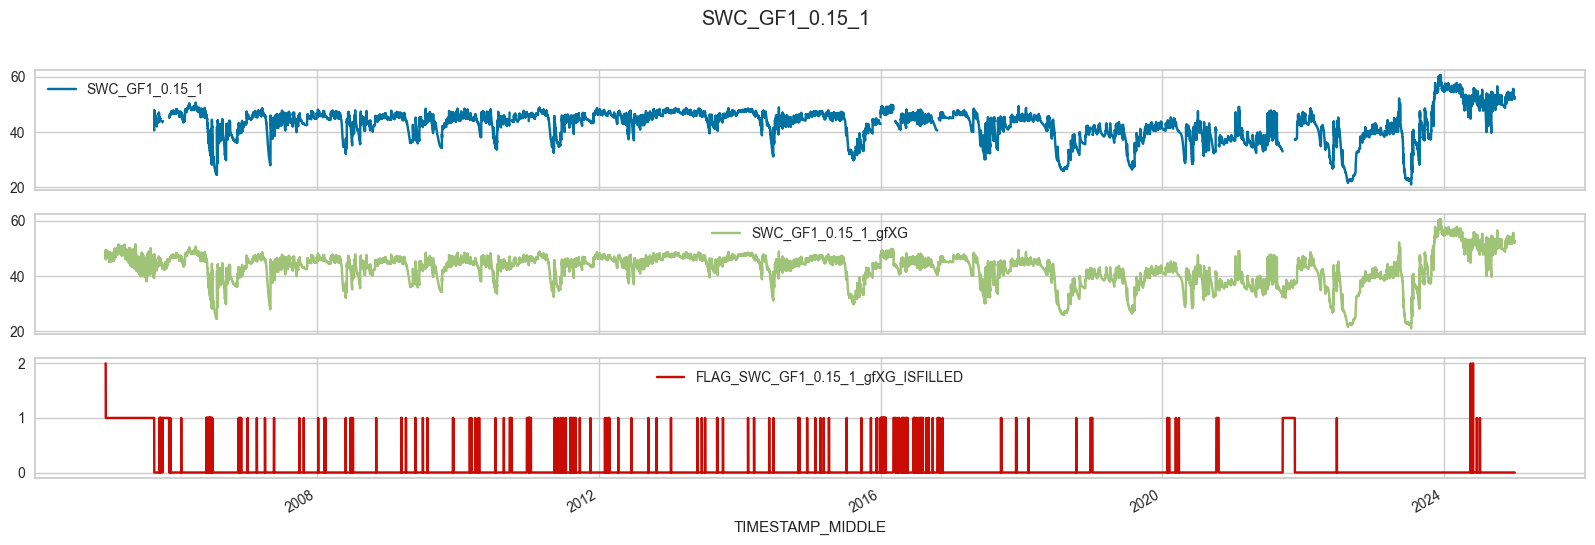

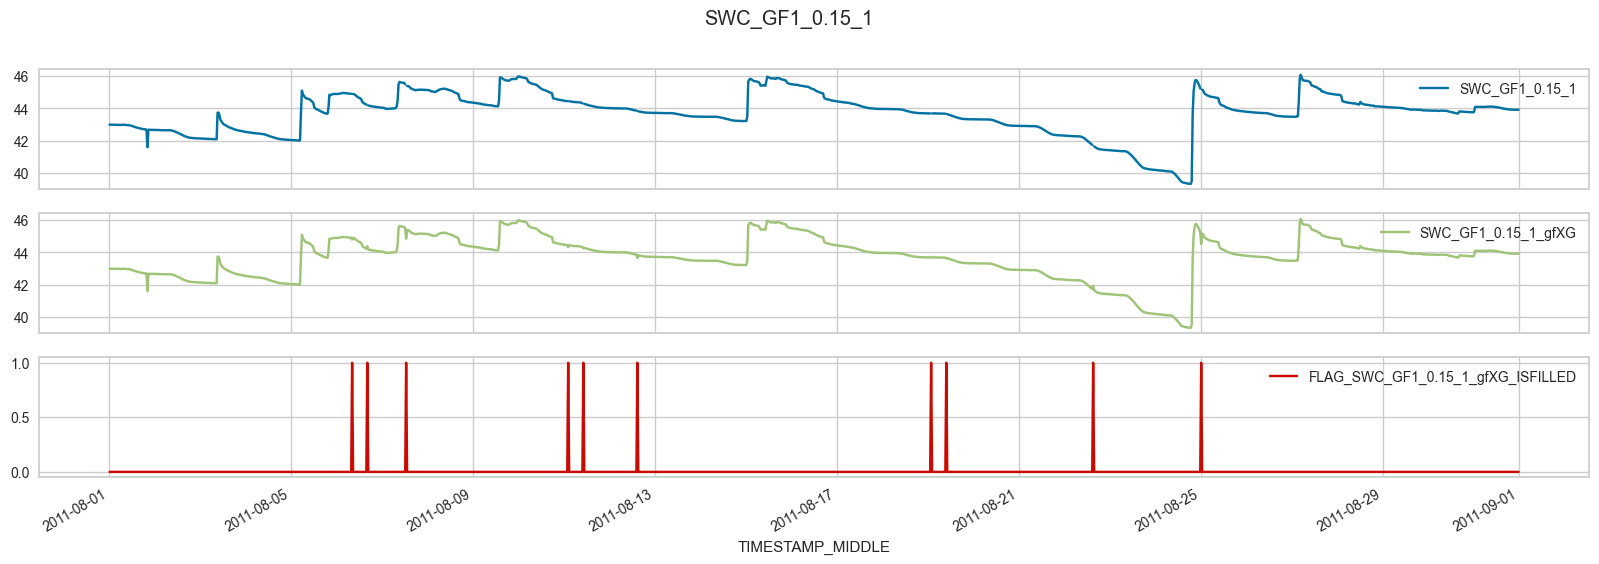

In [5]:
TARGET_COL = 'SWC_GF1_0.15_1'
TARGET_GAPFILLED_COL = f'{TARGET_COL}_gfXG'
FLAG_GAPFILLED_COL = f'FLAG_{TARGET_GAPFILLED_COL}_ISFILLED'

# Dataframe for gap-filling
_df = pd.DataFrame()
_df[TARGET_COL] = df[TARGET_COL].copy()
_df['PREC_RAIN_TOT_GF1_0.5_1'] = df['PREC_RAIN_TOT_GF1_0.5_1'].copy()
_df['TIMESINCE_PREC_RAIN_TOT_GF1_0.5_1'] = df['TIMESINCE_PREC_RAIN_TOT_GF1_0.5_1'].copy()

# XGBoost
xgb = XGBoostTS(
    input_df=_df,
    target_col=TARGET_COL,
    features_lag=[-5, -1],
    features_lag_exclude_cols=['TIMESINCE_PREC_RAIN_TOT_GF1_0.5_1'],
    perm_n_repeats=10,
    include_timestamp_as_features=True,
    add_continuous_record_number=True,
    n_estimators=1000,
    random_state=42,
    early_stopping_rounds=50,
    n_jobs=-1
)
xgb.reduce_features()
xgb.report_feature_reduction()
xgb.trainmodel(showplot_scores=False, showplot_importance=False)
xgb.report_traintest()
xgb.fillgaps(showplot_scores=False, showplot_importance=False)
xgb.report_gapfilling()
results = xgb.gapfilling_df_

# Add results to main data
df = pd.concat([df, results[[TARGET_GAPFILLED_COL, FLAG_GAPFILLED_COL]]], axis=1)

# Plot
plotdf = df[[TARGET_COL, TARGET_GAPFILLED_COL, FLAG_GAPFILLED_COL]].copy()
plotdf.plot(x_compat=True, title=TARGET_COL, subplots=True, figsize=(20, 6));
locs = (plotdf.index.year == 2011) & (plotdf.index.month == 8)
plotdf[locs].plot(x_compat=True, title=TARGET_COL, subplots=True, figsize=(20, 6));

# Sort column order

In [6]:
df = df.reindex(sorted(df.columns), axis=1)  # Sort column order

# Plot

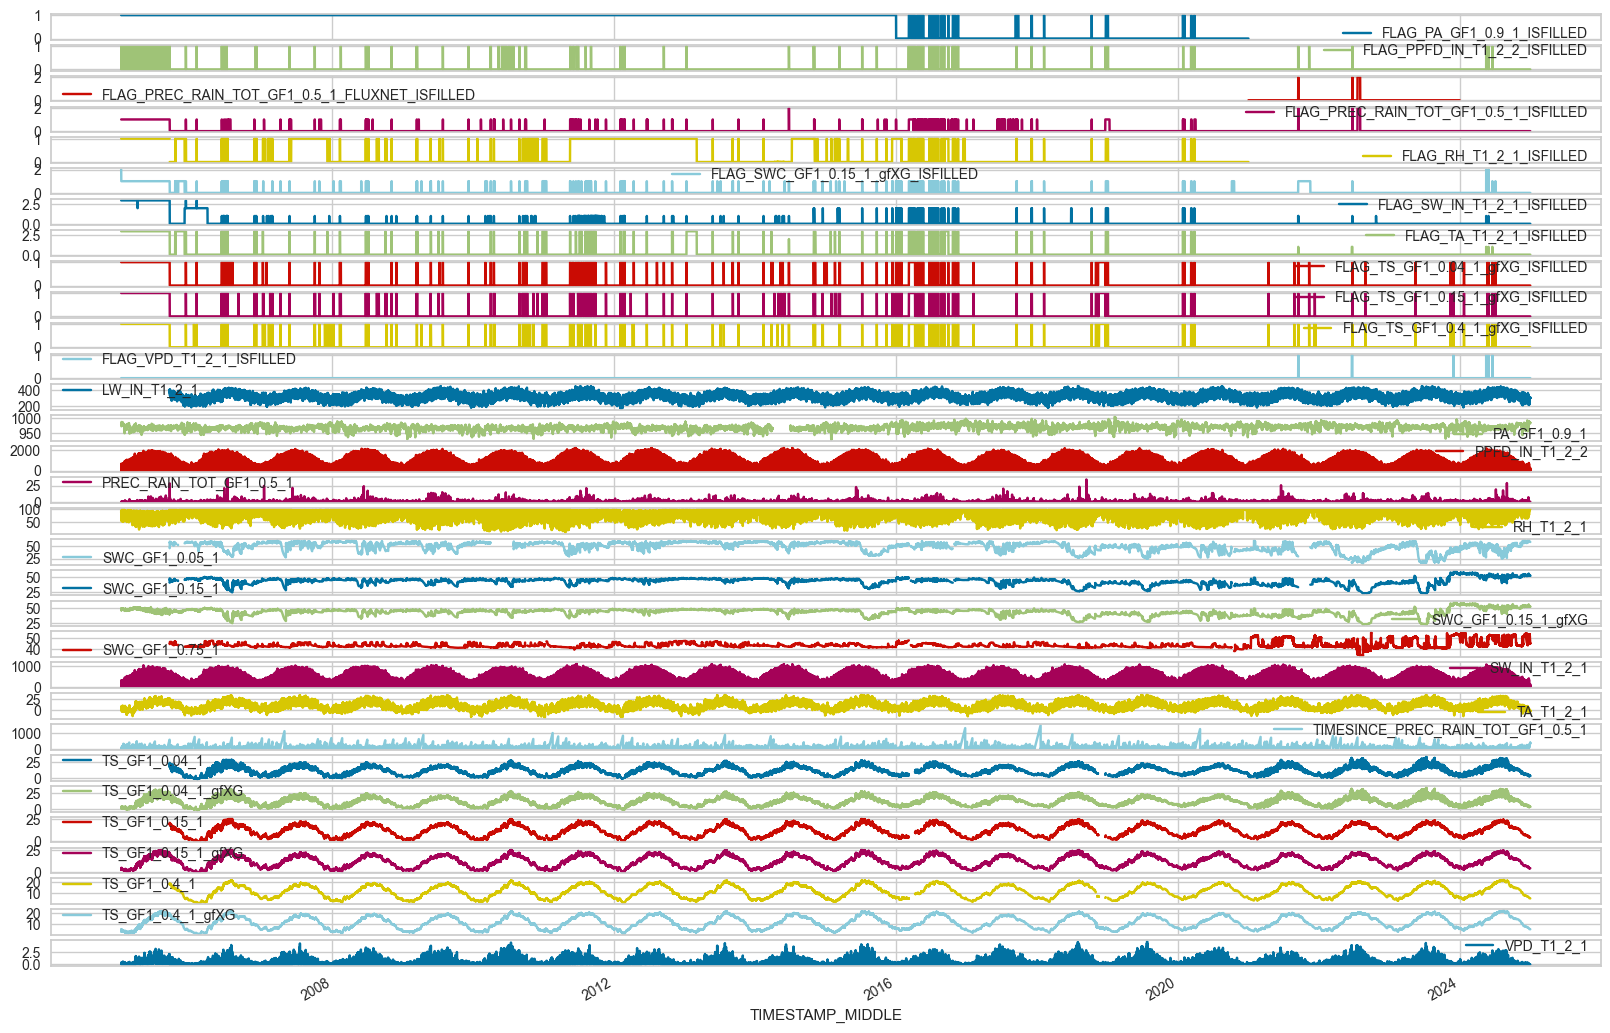

In [7]:
df.plot(x_compat=True, subplots=True, figsize=(20, 14));

# Save to file

In [12]:
OUTNAME = "17.5_CH-CHA_meteo10_2005-2024"
filepath = save_parquet(filename=OUTNAME, data=df)
# df.to_csv(f"{OUTNAME}.csv")

Saved file 17.5_CH-CHA_meteo10_2005-2024.parquet (0.436 seconds).


# **End of notebook**.

In [13]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-01-21 10:04:50
